In [1]:
import numpy as np
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 6

import seaborn as sns
import pandas as pd

from tqdm.notebook import tqdm

from scipy import stats

from sklearn import datasets


import openml

In [2]:
X_data_list = []
y_data_list = []
dataset_name = []

for task_num, task_id in enumerate(tqdm(openml.study.get_suite("OpenML-CC18").tasks)):
    try:
        successfully_loaded = True
        dataset = openml.datasets.get_dataset(openml.tasks.get_task(task_id).dataset_id)
        print(dataset)
        dataset_name.append(dataset.name)
        X, y, is_categorical, _ = dataset.get_data(
            dataset_format="array", target=dataset.default_target_attribute
        )
        _, y = np.unique(y, return_inverse = True)
        #X = np.nan_to_num(X[:, np.where(np.array(is_categorical) == False)[0]])
        X = np.nan_to_num(X)
    except TypeError:
        print("Skipping Dataset {}".format(dataset_idx))
        print()
        successfully_loaded = False
    if successfully_loaded and np.shape(X)[1] > 0:
        print('\n\nSuccess: ', task_num)
        X_data_list.append(X)
        y_data_list.append(y)

  0%|          | 0/72 [00:00<?, ?it/s]

OpenML Dataset
Name..........: kr-vs-kp
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:19:28
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/3/kr-vs-kp.arff
OpenML URL....: https://www.openml.org/d/3
# of features.: 37
# of instances: 3196


Success:  0
OpenML Dataset
Name..........: letter
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:19:41
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/6/letter.arff
OpenML URL....: https://www.openml.org/d/6
# of features.: 17
# of instances: 20000


Success:  1
OpenML Dataset
Name..........: balance-scale
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:19:55
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/11/balance-scale.arff
OpenML URL....: https://www.openml.org/d/11
# of features.: 5
# of instances: 625


Success:  2
OpenML Dataset
Name..........: mfeat-factors
Version.......: 1
Format...

OpenML Dataset
Name..........: mnist_784
Version.......: 1
Format........: ARFF
Upload Date...: 2014-09-29 03:28:38
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/52667/mnist_784.arff
OpenML URL....: https://www.openml.org/d/554
# of features.: 785
# of instances: 70000


Success:  27
OpenML Dataset
Name..........: pc4
Version.......: 1
Format........: ARFF
Upload Date...: 2014-10-06 23:57:12
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/53932/pc4.arff
OpenML URL....: https://www.openml.org/d/1049
# of features.: 38
# of instances: 1458


Success:  28
OpenML Dataset
Name..........: pc3
Version.......: 1
Format........: ARFF
Upload Date...: 2014-10-06 23:57:13
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/53933/pc3.arff
OpenML URL....: https://www.openml.org/d/1050
# of features.: 38
# of instances: 1563


Success:  29
OpenML Dataset
Name..........: jm1
Version.......: 1
Format........: ARF

OpenML Dataset
Name..........: GesturePhaseSegmentationProcessed
Version.......: 1
Format........: ARFF
Upload Date...: 2016-02-17 11:42:33
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/1798765/GesturePhaseSegmentationProcessed.arff
OpenML URL....: https://www.openml.org/d/4538
# of features.: 33
# of instances: 9873


Success:  52
OpenML Dataset
Name..........: har
Version.......: 1
Format........: ARFF
Upload Date...: 2015-05-22 20:38:11
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/1589271/har.arff
OpenML URL....: https://www.openml.org/d/1478
# of features.: 562
# of instances: 10299


Success:  53
OpenML Dataset
Name..........: dresses-sales
Version.......: 2
Format........: ARFF
Upload Date...: 2016-04-11 19:57:27
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/1910507/dresses-sales.arff
OpenML URL....: https://www.openml.org/d/23381
# of features.: 13
# of instances: 500


Success:  

In [3]:
sam = []
feat = []
for i in X_data_list:
    sam.append(i.shape[0])
    feat.append(i.shape[1])
    print('Samples: ', i.shape[0])
    print('Features: ', i.shape[1])
    print('\n')

Samples:  3196
Features:  36


Samples:  20000
Features:  16


Samples:  625
Features:  4


Samples:  2000
Features:  216


Samples:  2000
Features:  76


Samples:  699
Features:  9


Samples:  2000
Features:  64


Samples:  2000
Features:  6


Samples:  2000
Features:  47


Samples:  1473
Features:  9


Samples:  5620
Features:  64


Samples:  690
Features:  15


Samples:  1000
Features:  20


Samples:  10992
Features:  16


Samples:  768
Features:  8


Samples:  4601
Features:  57


Samples:  3190
Features:  60


Samples:  958
Features:  9


Samples:  846
Features:  18


Samples:  45312
Features:  8


Samples:  6430
Features:  36


Samples:  736
Features:  19


Samples:  3772
Features:  29


Samples:  990
Features:  12


Samples:  7797
Features:  617


Samples:  841
Features:  70


Samples:  797
Features:  4


Samples:  70000
Features:  784


Samples:  1458
Features:  37


Samples:  1563
Features:  37


Samples:  10885
Features:  21


Samples:  522
Features:  21


Samples:  2109
Feat

In [4]:
unique_classes = []
for i in y_data_list:
    unique_classes.append(len(np.unique(i)))
print(unique_classes)

count = 0
for i in unique_classes:
    if i == 2:
        count += 1
print(count)

[2, 26, 3, 10, 10, 2, 10, 10, 10, 3, 10, 2, 2, 10, 2, 2, 3, 2, 4, 2, 6, 5, 2, 11, 26, 4, 6, 10, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 10, 2, 2, 2, 2, 9, 6, 2, 2, 2, 2, 2, 5, 6, 2, 11, 3, 8, 7, 2, 2, 4, 7, 10, 10, 3, 2, 46, 10, 2, 3, 2]
35


In [5]:
dataset_name_new = np.expand_dims(np.array(dataset_name), axis=1)
sam_new = np.expand_dims(np.array(sam), axis=1)
feat_new = np.expand_dims(np.array(feat), axis=1)
unique_classes_new = np.expand_dims(np.array(unique_classes), axis=1)

In [6]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

total = np.concatenate((dataset_name_new, sam_new, feat_new, unique_classes_new), axis=1)
df = pd.DataFrame(total)
df.columns = ['Dataset Name', 'Samples', 'Features', 'Target Classes']
df

,Dataset Name,Samples,Features,Target Classes
0,kr-vs-kp,3196,36,2
1,letter,20000,16,26
2,balance-scale,625,4,3
3,mfeat-factors,2000,216,10
4,mfeat-fourier,2000,76,10
5,breast-w,699,9,2
6,mfeat-karhunen,2000,64,10
7,mfeat-morphological,2000,6,10
8,mfeat-zernike,2000,47,10
9,cmc,1473,9,3


In [116]:
def rf_classifier(X_train,
    y_train,
    num_trees,
    max_depth,
    n_jobs,
    verbose
):

    rf_model = RandomForestClassifier(
        n_estimators=num_trees, max_depth=max_depth, n_jobs=n_jobs, verbose=verbose
    )
    rf_model.fit(X_train, y_train)

    return rf_model


def binary_dn(
    X_train,
    y_train,
    hidden_nodes,
    batch_size,
    epochs,
    learning_rate,
    validation_split,
    verbose,
):

    dn_model = keras.Sequential()

    dn_model.add(keras.layers.Dense(X_train.shape[1], activation="relu"))
    dn_model.add(keras.layers.Dense(hidden_nodes, activation="relu"))
    dn_model.add(keras.layers.Dense(units=1, activation="sigmoid"))

    adam_optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    dn_model.compile(
        optimizer=adam_optimizer, loss="binary_crossentropy", metrics=["accuracy"]
    )

    dn_model.fit(
        x=X_train,
        y=y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=validation_split,
        verbose=verbose,
    )

    return dn_model


def multi_dn(
    X_train,
    y_train,
    hidden_nodes,
    batch_size,
    epochs,
    learning_rate,
    validation_split,
    verbose,
):

    dn_model = keras.Sequential()

    dn_model.add(keras.layers.Dense(X_train.shape[1], activation="relu"))
    dn_model.add(keras.layers.Dense(hidden_nodes, activation="relu"))
    dn_model.add(keras.layers.Dense(units=y_train.shape[1], activation="softmax"))

    adam_optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    dn_model.compile(
        optimizer=adam_optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )

    dn_model.fit(
        x=X_train,
        y=y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=validation_split,
        verbose=verbose,
    )
    
    print(dn_model.summary())

    return dn_model

In [8]:
from random import sample

def random_sample(data, num_samples):
    ordered = [i for i in range(len(data))]

    return sorted(sample(ordered,num_samples))

s = random_sample(X_data_list, 10)


In [166]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import keras

def test_suite(
    X_train,
    y_train,
    X_test,
    y_test,
    training_sample_sizes,
    trials,
    num_trees=50,
    max_depth=None,
    n_jobs=-1,
    rf_verbose=2,
    hidden_nodes=4,
    batch_size=64,
    epochs=10,
    learning_rate=0.001,
    validation_split=0.3,
    dn_verbose=1,
):

    rf_evolution = np.zeros((len(training_sample_sizes), trials))
    dn_evolution = np.zeros((len(training_sample_sizes), trials))

    for trial in range(trials):

        for sample_size_index, max_sample_size in enumerate(training_sample_sizes):

#             X_train = X_train.astype("float32")
#             y_train = y_train.astype("float32")
            s = random_sample(X_train, max_sample_size)
            X_train_new = X_train[s]
            y_train_new = y_train[s]
            
            y_train_cat = to_categorical(y_train, len(np.unique(y_train)))
            y_test_cat = to_categorical(y_test, len(np.unique(y_test)))
            print(y_train_cat.shape)
#             X_test, y_test = sparse_parity(testing_sample_size, p, p_star)

            rf_model = rf_classifier(
                X_train=X_train_new,
                y_train=y_train_new,
                num_trees=num_trees,
                max_depth=max_depth,
                n_jobs=n_jobs,
                verbose=rf_verbose,
            )

            rf_predictions = rf_model.predict(X_test)
            rf_error = 1 - accuracy_score(y_test, rf_predictions)
            rf_evolution[sample_size_index][trial] = rf_error

            if len(np.unique(y_train)) == 2:
                print('\n\nBINARY\n\n')
                print(y_train)
                print(y_train.shape)
                dn_model = binary_dn(
                    X_train=X_train_new,
                    y_train=y_train_new,
                    epochs=epochs,
                    batch_size=batch_size,
                    learning_rate=learning_rate,
                    validation_split=validation_split,
                    hidden_nodes=hidden_nodes,
                    verbose=dn_verbose,
                )
                
                score = dn_model.evaluate(
                    X_test,
                    y_test,
                    batch_size=None,
                    verbose=0,
                    sample_weight=None,
                    steps=None,
                    callbacks=None,
                    max_queue_size=10,
                    workers=1,
                    use_multiprocessing=False,
                    return_dict=False,
                )
                
            else:
                print('\n\nMULTICLASS\n\n')

                X_train_new = X_train[s]
                y_train_new = y_train_cat[s]
                print(y_train_new.shape)
                
                dn_model = multi_dn(
                    X_train=X_train_new,
                    y_train=y_train_new,
                    epochs=epochs,
                    batch_size=batch_size,
                    learning_rate=learning_rate,
                    validation_split=validation_split,
                    hidden_nodes=hidden_nodes,
                    verbose=dn_verbose,
                )

                score = dn_model.evaluate(
                    X_test,
                    y_test_cat,
                    batch_size=None,
                    verbose=0,
                    sample_weight=None,
                    steps=None,
                    callbacks=None,
                    max_queue_size=10,
                    workers=1,
                    use_multiprocessing=False,
                    return_dict=False,
                )
            print(score)
            dn_error = 1 - score[1]
            dn_evolution[sample_size_index][trial] = dn_error

    return rf_evolution, dn_evolution


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data_list[0], y_data_list[0], test_size=0.3, random_state=42)

print(X_train.shape)

(437, 4)


In [12]:
training_sample_sizes = X_train.shape[0]
hidden_nodes = list(range(3,33,3))

In [ ]:
scores = []

for nodes in hidden_nodes:
    dn_model = binary_dn(
        X_train=X_train,
        y_train=y_train,
        epochs=10,
        batch_size=64,
        learning_rate=0.001,
        validation_split=0.3,
        hidden_nodes=nodes,
        verbose=1,
    )

    score = dn_model.evaluate(
        X_test,
        y_test,
        batch_size=None,
        verbose=0,
        sample_weight=None,
        steps=None,
        callbacks=None,
        max_queue_size=10,
        workers=1,
        use_multiprocessing=False,
        return_dict=False,
    )
    
    scores.append(score)
    
print(scores)

In [ ]:
training_sample_sizes = [250,500,750,1000,1300,1600,1900,X_train.shape[0]]
trials = 10

rf_evolution_1, dn_evolution_1 = test_suite(X_train, y_train, X_test, y_test, training_sample_sizes, trials,
                                       hidden_nodes=30)

In [12]:
%store rf_evolution_1
%store df_evolution_1

Stored 'rf_evolution_1' (ndarray)


UsageError: Unknown variable 'df_evolution_1'


In [ ]:
rf_evolution_1

In [ ]:
dn_evolution_1

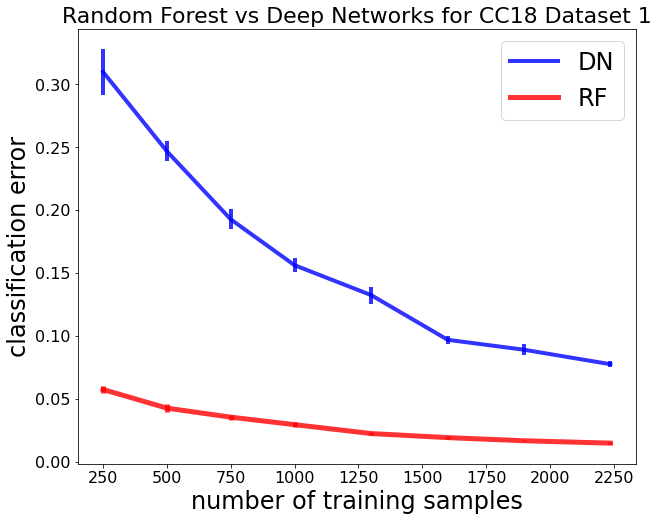

In [13]:
dn_evolution_mean = np.mean(dn_evolution_1, axis=1)
rf_evolution_mean = np.mean(rf_evolution_1, axis=1)

yerr_dn = stats.sem(dn_evolution_1, axis=1)
yerr_rf = stats.sem(rf_evolution_1, axis=1)

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111)

ax.errorbar(
    training_sample_sizes,
    dn_evolution_mean,
    yerr=yerr_dn,
    linewidth=4,
    c="b",
    alpha=0.8,
    label="DN",
)
ax.errorbar(
    training_sample_sizes,
    rf_evolution_mean,
    yerr=yerr_rf,
    linewidth=5,
    c="r",
    alpha=0.8,
    label="RF",
)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel("number of training samples", fontsize=24)
plt.ylabel("classification error", fontsize=24)
plt.title("Random Forest vs Deep Networks for CC18 Dataset 1", fontsize=22)

handles, labels = ax.get_legend_handles_labels()
handles = [h[0] for h in handles]
ax.legend(handles, labels, prop={"size": 24})

# plt.savefig("/Users/elizabethloh/Desktop/github/rf-dn-paper/figures/ds1")

In [ ]:
all_datasets_1 = {}

for dataset in range(12):
    X_train, X_test, y_train, y_test = train_test_split(X_data_list[dataset], 
                                                        y_data_list[dataset], test_size=0.3, random_state=42)

    training_sample_sizes = [round(X_train.shape[0]/5),round(X_train.shape[0]/2.5),
                             round(X_train.shape[0]/2),round(X_train.shape[0]/1.5),
                             X_train.shape[0]]
    trials = 20

    rf_evolution, dn_evolution = test_suite(X_train, y_train, X_test, y_test, training_sample_sizes, trials,
                                           hidden_nodes=30)
    
    all_datasets_1[dataset] = [rf_evolution, dn_evolution]

In [210]:
# %store all_datasets
%store all_datasets_1

Stored 'all_datasets_1' (dict)


In [211]:
all_datasets

{0: [array([[0.03962461, 0.04692388, 0.02919708, 0.0354536 , 0.03441084,
          0.03858186, 0.02815433, 0.04171011, 0.04066736, 0.05422315],
         [0.02606882, 0.04379562, 0.02711157, 0.02919708, 0.02711157,
          0.03023983, 0.03336809, 0.02502607, 0.02711157, 0.02085506],
         [0.02502607, 0.03232534, 0.03232534, 0.02189781, 0.01668405,
          0.03023983, 0.02815433, 0.0198123 , 0.03336809, 0.01876955],
         [0.02711157, 0.02189781, 0.0198123 , 0.0177268 , 0.0177268 ,
          0.02606882, 0.01876955, 0.02606882, 0.01564129, 0.02085506],
         [0.01459854, 0.01251303, 0.01251303, 0.01564129, 0.01668405,
          0.0177268 , 0.01355579, 0.01042753, 0.01355579, 0.01459854]]),
  array([[0.2116788 , 0.22732013, 0.25130343, 0.26903021, 0.34202296,
          0.26694471, 0.29822731, 0.30031282, 0.25130343, 0.26903021],
         [0.15015644, 0.17101145, 0.17518246, 0.14285713, 0.13660061,
          0.2116788 , 0.16788322, 0.14494264, 0.17935348, 0.15119916],
        

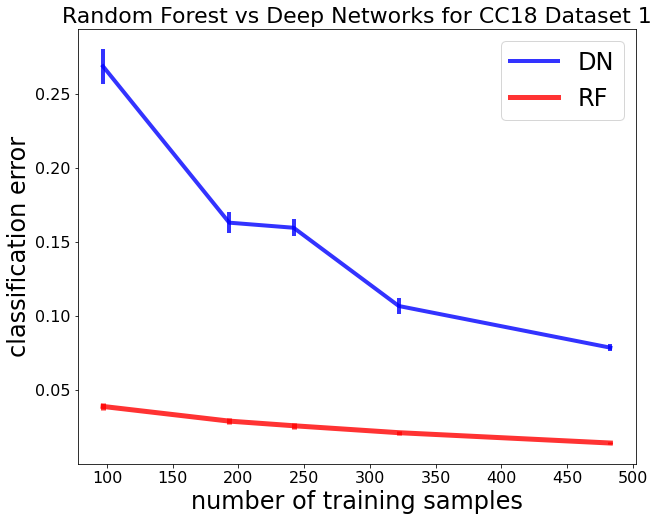

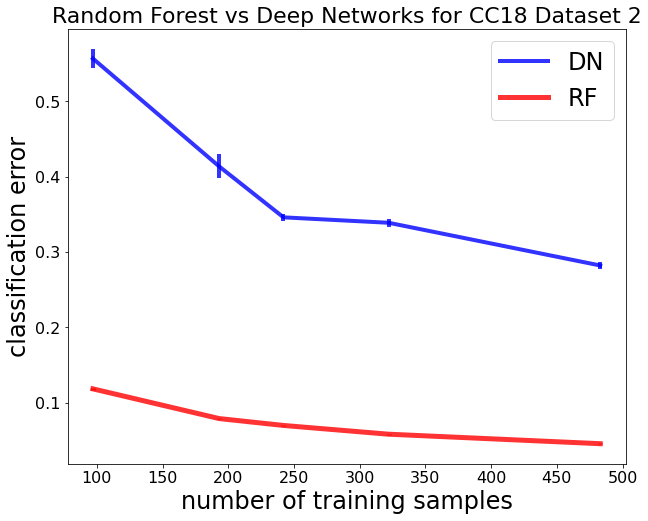

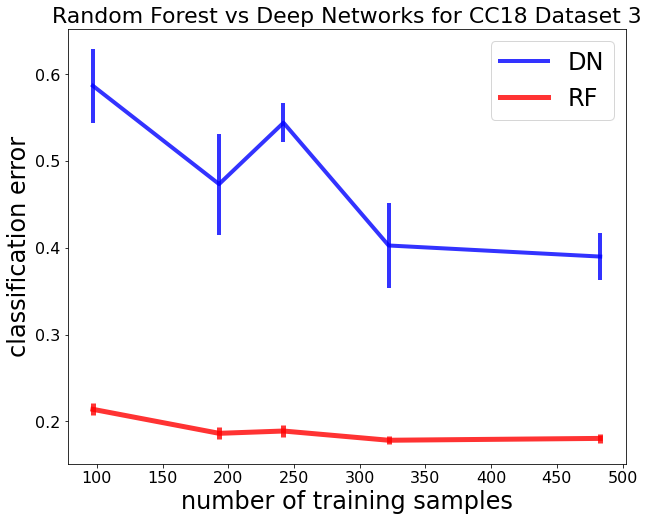

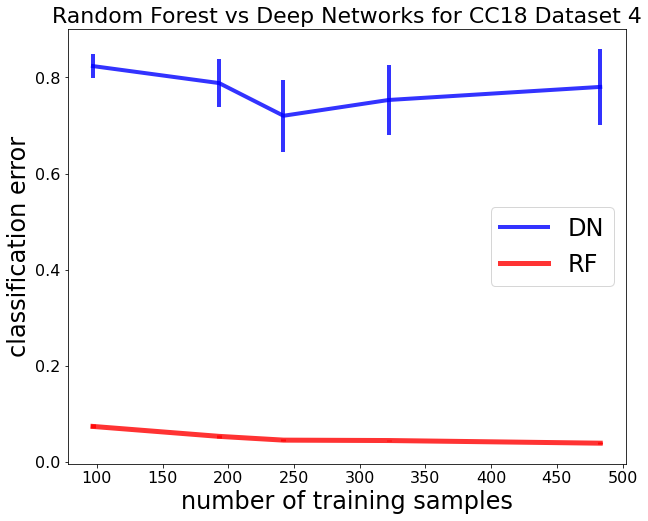

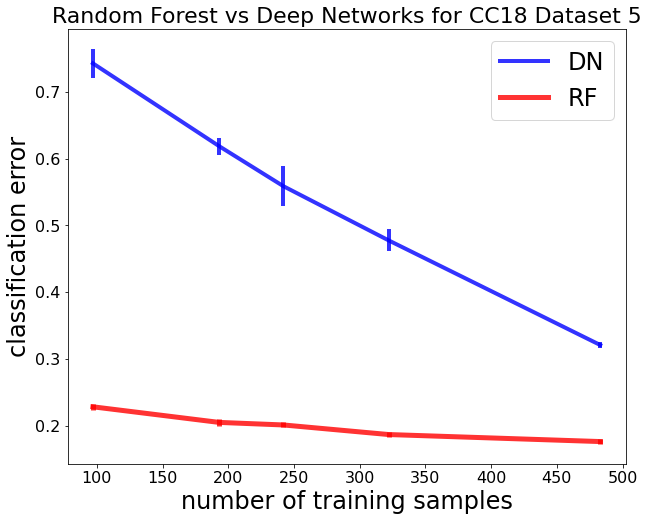

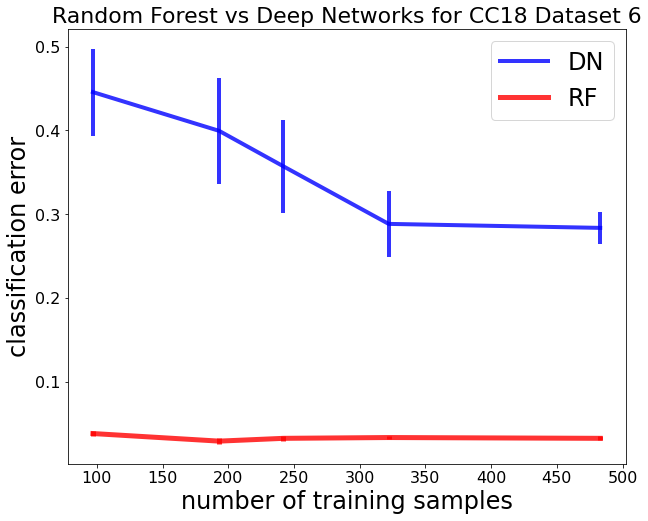

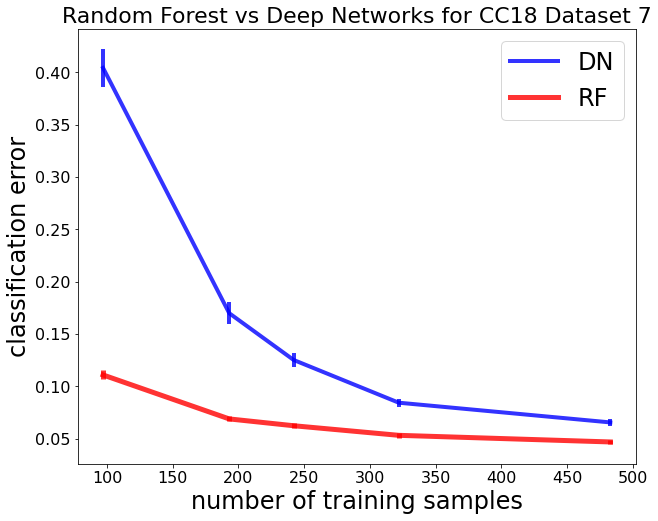

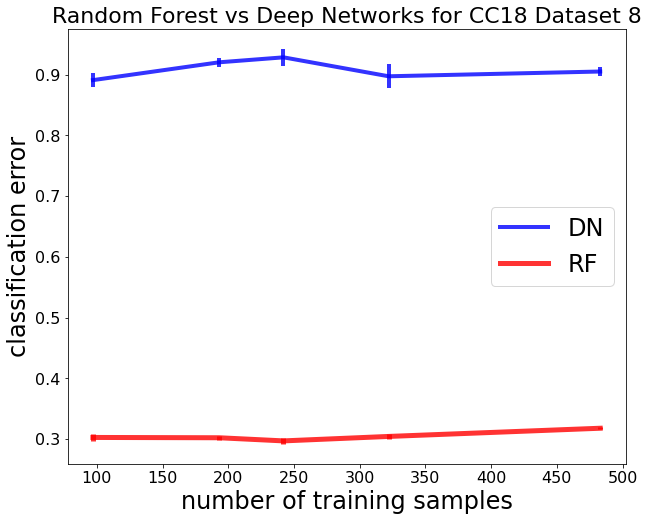

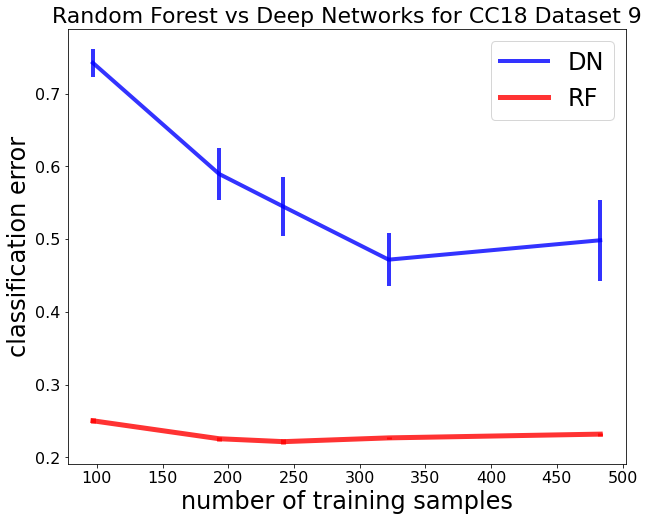

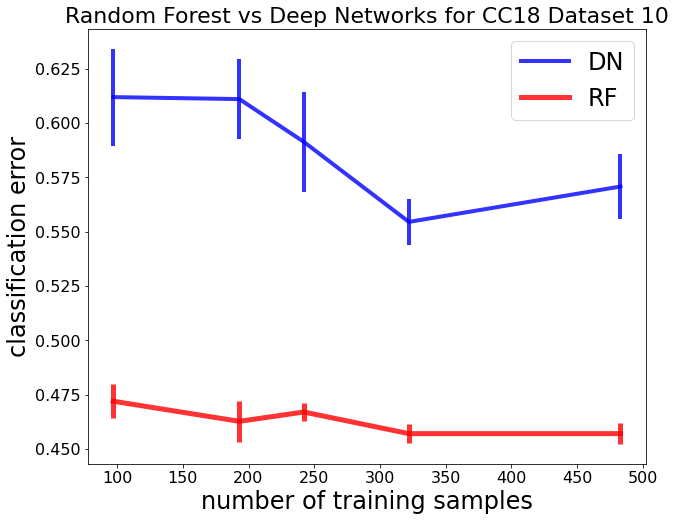

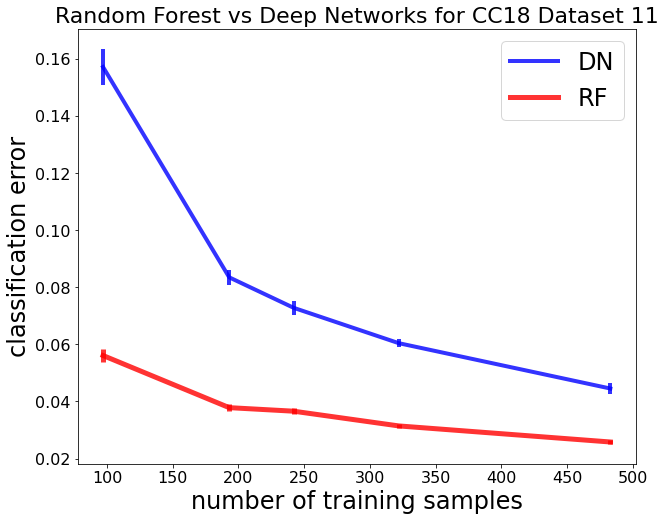

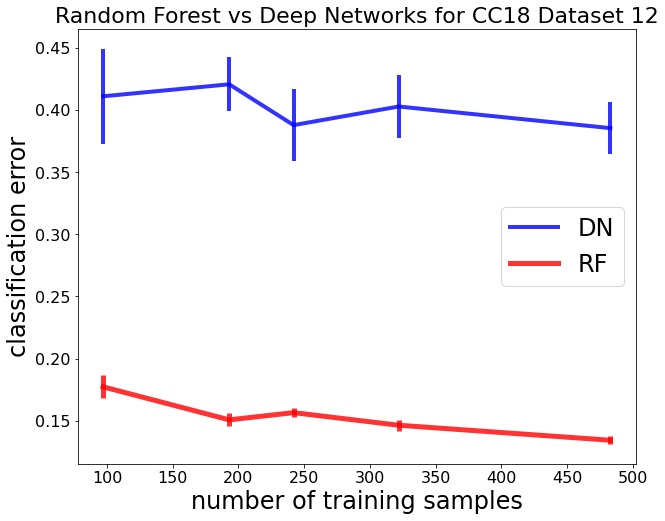

In [213]:
for key in all_datasets:
    rf,dn = all_datasets[key][0],all_datasets[key][1]
    dn_evolution_mean = np.mean(dn, axis=1)
    rf_evolution_mean = np.mean(rf, axis=1)

    yerr_dn = stats.sem(dn, axis=1)
    yerr_rf = stats.sem(rf, axis=1)

    fig = plt.figure(figsize=(10, 8))
    ax = plt.subplot(111)

    ax.errorbar(
        training_sample_sizes,
        dn_evolution_mean,
        yerr=yerr_dn,
        linewidth=4,
        c="b",
        alpha=0.8,
        label="DN",
    )
    ax.errorbar(
        training_sample_sizes,
        rf_evolution_mean,
        yerr=yerr_rf,
        linewidth=5,
        c="r",
        alpha=0.8,
        label="RF",
    )

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.xlabel("number of training samples", fontsize=24)
    plt.ylabel("classification error", fontsize=24)
    plt.title("Random Forest vs Deep Networks for CC18 Dataset " + str(key + 1), fontsize=22)

    handles, labels = ax.get_legend_handles_labels()
    handles = [h[0] for h in handles]
    ax.legend(handles, labels, prop={"size": 24})
    
    name = 'dataset_new' + str(key)
    plt.savefig("/Users/elizabethloh/Desktop/github/rf-dn-paper/figures/" + name)

In [202]:
'dataset' + str(dataset)

'dataset1'